In [1]:
using LinearAlgebra
using Plots

function param_method(A, b; tau, tol=1e-5, maxiter=20000)
    n = length(b)
    x = zeros(eltype(b), n)

    for k in 1:maxiter
        r = b - A * x
        x_next = x + tau * r
        if norm(x_next - x) < tol
            return x_next, k
        end
        x = x_next
    end
    return x, maxiter
end

param_method (generic function with 1 method)

In [2]:
function generate_system(n=5)
    B = rand(n, n)
    A = B' * B + n * I
    b = rand(n)

    λ = eigvals(A)
    λ_max = maximum(λ)
    λ_min = minimum(λ)

    return A, b, λ_max, λ_min
end

generate_system (generic function with 2 methods)

In [3]:
function plot_results(tau_values, iters, times_ms, tau_opt, n)
    p_iters = plot(
        tau_values, iters;
        marker=:circle,
        linewidth=2,
        xlabel="τ",
        ylabel="Итерации",
        title="Сходимость по числу итераций (n=$n)",
        legend=false,
        grid=true,
        color=:blue
    )
    vline!(p_iters, [tau_opt], linestyle=:dash, linewidth=2, color=:red)
    annotate!(p_iters, tau_opt, maximum(iters) / 2,
        text("τ*=$(round(tau_opt, digits=4))", :red, 10))

    p_time = plot(
        tau_values, times_ms;
        marker=:circle,
        linewidth=2,
        xlabel="τ",
        ylabel="Время, мс",
        title="Сходимость по времени (n=$n)",
        legend=false,
        grid=true,
        color=:green
    )
    vline!(p_time, [tau_opt], linestyle=:dash, linewidth=2, color=:red)
    annotate!(p_time, tau_opt, maximum(times_ms) / 2,
        text("τ*=$(round(tau_opt, digits=4))", :red, 10))

    display(plot(p_iters, p_time, layout=(2, 1), size=(800, 600)))
end

plot_results (generic function with 1 method)

τ      	Итерации	Время(мс)
-----------------------------
0.01	62		159.111
0.0123	52		0.09
0.0145	44		0.091
0.0168	39		0.054
0.0191	34		0.056
0.0214	31		0.043
0.0236	28		0.044
0.0259	26		0.038
0.0282	24		0.017
0.0304	22		0.019
0.0327	20		0.007
0.035	19		0.011
0.0373	18		0.015
0.0395	17		0.004
0.0418	16		0.009
0.0441	15		0.009
0.0463	18		0.004
0.0486	22		0.027
0.0509	30		0.031
0.0531	43		0.022


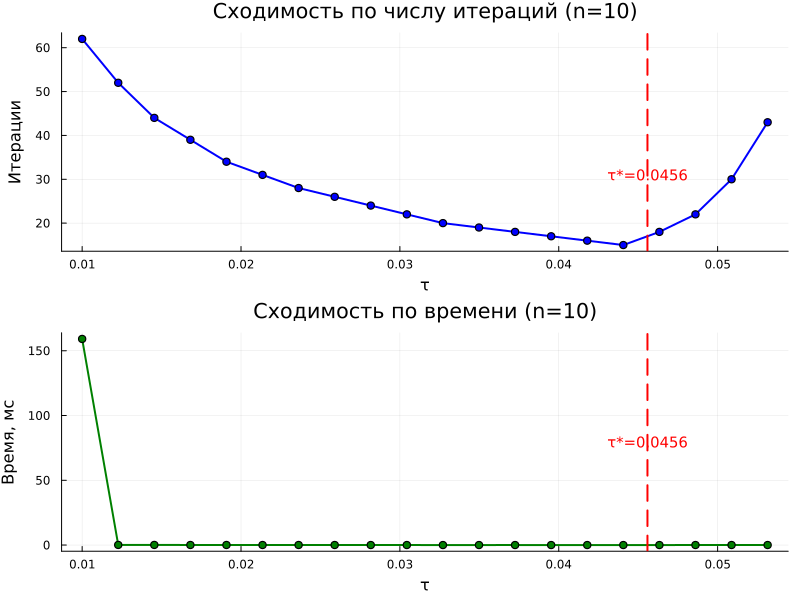

(A = [14.004898655098597 2.8930840853721276 … 2.8967051713973495 2.833539145927633; 2.8930840853721276 13.101575116706073 … 2.491743474431869 2.766929959589484; … ; 2.8967051713973495 2.491743474431869 … 13.488958556444496 2.6734112791356677; 2.833539145927633 2.766929959589484 … 2.6734112791356677 14.539667843195337], b = [0.7278847867506942, 0.31214160177864336, 0.1475532000428138, 0.08301697661493501, 0.525377818031998, 0.8534199963209961, 0.14918720026080967, 0.8943674159821021, 0.8553276596195727, 0.9943552901761293], tau_values = 0.01:0.0022709270043996532:0.05314761308359341, iterations = [62.0, 52.0, 44.0, 39.0, 34.0, 31.0, 28.0, 26.0, 24.0, 22.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 18.0, 22.0, 30.0, 43.0], times_ms = [159.11125, 0.090291, 0.090833, 0.053542000000000006, 0.055624999999999994, 0.042542, 0.043791000000000004, 0.037667, 0.01675, 0.019084, 0.006959, 0.011416, 0.014833, 0.004208, 0.008667, 0.009458, 0.003834, 0.026958, 0.030833000000000003, 0.021542000000000002], la

In [4]:
n = 10
num_tau = 20
A, b, λ_max, λ_min = generate_system(n)

tau_values = range(0.01, 0.9 * 2 / λ_max, length=num_tau)

iters = Float64[]
times_ms = Float64[]

println("τ      \tИтерации\tВремя(мс)")
println("-----------------------------")

# Тестирование метода для разных значений τ
for tau in tau_values
    t = @elapsed begin
        _, k = param_method(A, b; tau=tau)
    end
    push!(iters, k)
    push!(times_ms, t * 1000)
    println("$(round(tau, digits=4))\t$k\t\t$(round(t*1000, digits=3))")
end

tau_opt = 2 / (λ_max + λ_min)

plot_results(tau_values, iters, times_ms, tau_opt, n)

return (
    A=A,
    b=b,
    tau_values=tau_values,
    iterations=iters,
    times_ms=times_ms,
    lambda_min=λ_min,
    lambda_max=λ_max,
    tau_opt=tau_opt,
)